<a href="https://colab.research.google.com/github/doodger/dataScience/blob/master/kMeans.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In this notebook I attempt to implement the K-Means clustering algorithm and test its performance.

The mathematical definition of the algorithm was taken on Wikipedia; its naive version is currently the only one implemented. For starting position of the k centroids, a random selection of k data points is taken.

A simple 2-D data sets of nine points clustered around (0,0), (0,1) and (1,1) was used to debug the algorithm initially. A later section sees the Iris dataset used for testing, and the performance of my implementation is compared to SKLearn's version of K-Means

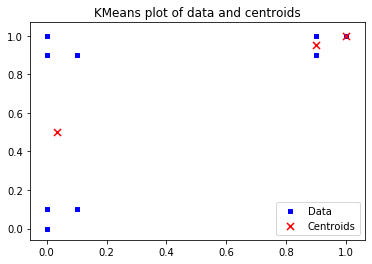

0

In [8]:
#This exercise is an attempt to implement K-means from scratch.
#The first algorithm implementation tried will be "naive k-means", initialized
#    with k initial points, into which all data points are inserted into
#    k categories.
#From this initialization, every step the mean of each group is calculated and 
#    the data points are reassigned, until there are no more change in centroid
import numpy as np
from scipy.spatial.distance import cdist
import pandas as pd
import matplotlib.pyplot as plt

def kMeans(data, k):
  #data is a numpy array of the n points in array form
  n = data.shape[0]
  #initialization; the k initial centroids are chosen randomly
  m = data[np.random.choice(n,k,False)]#random index are picked without replacement
  newM = np.zeros(m.shape) 
  
  sortedData = np.zeros(n)
  #iteration
  delta=1 #arbitrary distance between
  while(delta>0.000000000001):#For as long as changes in centroid are big enough

    #assign every data point to a centroid
    for row in range(data.shape[0]):
      #calculate the euclidean distance to each centroid and find the closest one
      point = data[row]
      distance = cdist(point.reshape(1,2),m) #cdist function takes 1 by dim and k by dim arguments
      closestCentroid = np.argmin(distance)
      sortedData[row]=closestCentroid
    #calculate new Centroids
    for centroid in range(k):
      indexOfCentroid = np.where(sortedData == centroid)
      if(indexOfCentroid[0].shape[0]==0):
          print("KMeans generated a group of size 0")
          return(0,0)
      newM[centroid] = sum(data[indexOfCentroid])/indexOfCentroid[0].shape[0]
    
    delta = np.linalg.norm(newM-m)
    m = newM
    for row in range(data.shape[0]): #final pass to assign the proper group of indexes
      #calculate the euclidean distance to each centroid and find the closest one
      point = data[row]
      distance = cdist(point.reshape(1,2),m) #cdist function takes 1 by dim and k by dim arguments
      closestCentroid = np.argmin(distance)
      sortedData[row]=closestCentroid
  return(sortedData,m)
  #return(sortedData,centroids)

def generateKMeansGraph2d(data,centroids,title="KMeans plot of data and centroids", color='b'):
  #function to generate a graph showing the data points divided into groups according to their centroids
  #Only for 2d datasets

  if (data[0].shape[0]!=2):
    print("Function only for 2d data!")
    return(0)

  x = []
  y = []
  [[x.append(row[0]),y.append(row[1])] for row in data]  

  xCentroid = []
  yCentroid = []
  [[xCentroid.append(row[0]),yCentroid.append(row[1])] for row in centroids]  
  fig = plt.figure()
  ax1 = fig.add_subplot(111)
  dataScatter = ax1.scatter(x, y, s=10, c=color, marker="s", label='Data')
  centroidScatter = ax1.scatter(xCentroid,yCentroid, s=50, c='r', marker="x", label='Centroids')
  plt.title(title)
  plt.legend(handles=[dataScatter,centroidScatter])
  plt.show()
  
  return(0)




tData = np.array([[0,0],[1/10,1/10],[0,1/10],[0,1],[0,9/10],[1/10,9/10],[1,1],[9/10,1],[9/10,9/10]])
sortedData,centroids = kMeans(tData,3)
generateKMeansGraph2d(tData,centroids)

Up next, a compare and contrast session with SKLearn using the Iris dataset as a first playground for testing.

[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2]


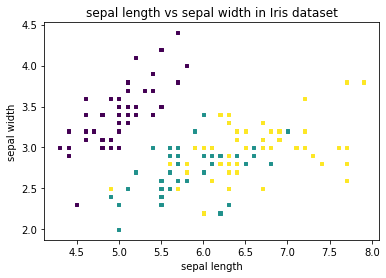

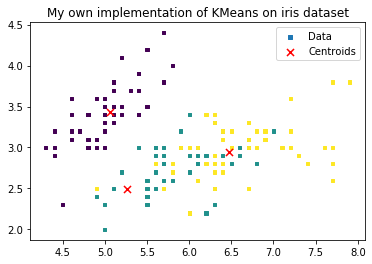

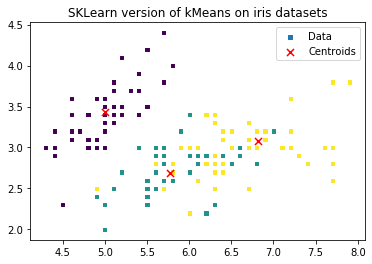

0

In [9]:
from sklearn import datasets
from sklearn.cluster import KMeans as sklearnKMeans #to contrast with my own KMeans

iris = datasets.load_iris() #loading the iris data set
#in order to compare my KMeans vs SKLearn's KMeans, the first two feature will be taken
x = iris.data[:, 0] #Sepal length
y = iris.data[:, 1] #Sepal width
targetCategory = iris.target #array of category for each flower, used later for color

fig = plt.figure()
ax1 = fig.add_subplot(111)
ax1.scatter(x, y, s=10, c=targetCategory, marker="s", label='first')
plt.title("sepal length vs sepal width in Iris dataset")
plt.xlabel("sepal length")
plt.ylabel("sepal width")
plt.show()

tData = np.array(list(zip(x,y)))
sortedData,centroids = kMeans(tData,3)
generateKMeansGraph2d(tData,centroids, color=targetCategory, title="My own implementation of KMeans on iris dataset")

skSortedData = sklearnKMeans(n_clusters = 3).fit(tData)
skSortedData.cluster_centers_
generateKMeansGraph2d(tData,skSortedData.cluster_centers_, color = targetCategory, title="SKLearn version of kMeans on iris datasets")


My implementation of K-Means proposes centroids that are not too far from their SKLearn version. Quantitatively, how do the predictive power of both method compare? As an unsupervised method, it is difficult to establish a good metric to verify this. Because the iris dataset labels are known, purity is used as a measuring tool

In [0]:
from sklearn.model_selection import train_test_split

X = iris.data[:, 0:2] #Sepal length and width
y = iris.target

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state=0)

#SKLearn version of K-Means clustering
sklearnKMeansResults = sklearnKMeans(n_clusters=3,random_state=0).fit(X_train) #y_train unused for K-Means


There are many things that can be done to make my implementation of the algorithm more robust, and to test its performance better

*   Perhaps I could refactor code so the final pass is not required
*   At current it is a possibility that the algorithm will generate an iteration with a category containing zero points, making the algorithm crash. A safer solution to this should be searched
*   Right now only Naive KMeans is implemented, with a randomized initial centroid positions. Alternative or better version of the algorithm could be implemented
*   More rigorous tests on datasets such as Iris where the predictive power of my implementation of KMeans is determined, and compared to SKLearn's performances
*   Testing the algorithm for k values other than 3, and for data in other dimension than 2D
*   Data must be standardized before KMeans is used
